# Exploratory Analysis of Borrower Characteristics and Loan Conditions(EDA & SQL)

## Objective
The objective of this study is to explore relationships between borrower characteristics(BC) (credit score, annual income, and employment status) and loan attributes(LA) (interest rate, loan amount, and loan purpose) using exploratory data analysis and SQL-based queries.

**Borrower Characteristics:**
- Credit Score
- Annual Income
- Employment Status

**Loan Characteristics:**
- Interest Rate
- Loan Amount
- Loan Purpose

## Research Questions
RQ1: How does the credit score have influence on  deciding Loan attributes?

    - How does credit score relate to interest rate?
    - How does credit score relate to loan amount?
    - How does loan purpose vary across different credit score ranges?

RQ2: Annual Income and Loan Size

    - How does a borrower’s annual income relate to the loan amount issued?

RQ3: Employment Status and Loan Characteristics

    - How do loan amounts differ by employment status?
    - How do interest rates vary across employment statuses?
    - How does loan purpose distribution differ by employment status?

## Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

## Load Dataset

In [ ]:
data_path = r"./dataset/loan.csv"

# Read the dataset
data = pd.read_csv(data_path)

# Create copy of DataFrame
df = data.copy()

# Display top-5 rows of the dataset
df.head()


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


## Data Overview

### Quick Overview

- Check and clear columns names.
- Identify the shape of the dataset.
- Check the datatypes.
- Find missing values.
- Check duplicate rows.

In [ ]:
# Display columns of the dataset
df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [ ]:
# Clean columns names to remove unwanted whitespaces and convert it to lowercase

# Make columns names list
cols_list = list(df.columns)

# Define a empty list
new_cols_list = []

for col in cols_list:
    cleaned_col = col.strip().lower()              # Strip whitespaces & convert to lowercase
    new_cols_list.append(cleaned_col)              # Add cleaned column name to new list

df.columns = new_cols_list                         # Assign cleaned column names to columns names

# Display the columns names
df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [ ]:
# Check the shape of the dataset
df.shape

(593994, 13)

In [ ]:
# Check datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.50,171471.44,0.00,148498.25,296996.50,445494.75,593993.00
annual_income,593994.0,48212.20,26711.94,6002.43,27934.40,46557.68,60981.32,393381.74
debt_to_income_ratio,593994.0,0.12,0.07,0.01,0.07,0.10,0.16,0.63
credit_score,593994.0,680.92,55.42,395.00,646.00,682.00,719.00,849.00
loan_amount,593994.0,15020.30,6926.53,500.09,10279.62,15000.22,18858.58,48959.95
interest_rate,593994.0,12.36,2.01,3.20,10.99,12.37,13.68,20.99
loan_paid_back,593994.0,0.80,0.40,0.00,1.00,1.00,1.00,1.00


**Insights**
- The dataset contains 593,994 loan rows of data with borrower characteristics and loan attributes.
- It includes 13 total columns which are mix of numerical and categorical variables.
- We have related to income, credit score, employment status, loan amount, interest rate, and loan purpose.
- `id` columns is a unique identifier. It can be drop or converted as index in later in data cleaning.

## Data Cleaning

### Duplicate Rows

In [ ]:
# Check duplicate rows in the dataset
duplicated_rows = df.duplicated().sum()

print("Duplicate values present in the dataset: ", duplicated_rows)

Duplicate values present in the dataset:  0


### Missing Values

In [ ]:
#  Find missing values.
df.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [ ]:
# Total missing count
print("Total missing values: ", df.isnull().sum().sum())

Total missing values:  0


### Drop Columns

Since this analysis focuses on exploring relationships between borrower characteristics and loan conditions, columns that are outside the project scope, redundant, or not required for EDA are removed to keep the dataset focused and interpretable.

The following columns are dropped with justification:

- `gender, marital_status, education_level`
These variables are not part of the project objective or research questions.

- `grade_subgrade`
This variable is derived from credit score and would introduce redundancy. Credit score is used as the primary risk indicator.

- `loan_paid_back`
This is an outcome variable related to loan repayment. Since this project does not include repayment analysis or predictive modeling, it is excluded.

- `debt_to_income_ratio`
Although relevant to credit risk, it is excluded to maintain a focused scope on the primary borrower characteristics defined in the project objective.


In [ ]:
df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [ ]:
# Create a list of columns to drop
cols_to_drop = ["gender","marital_status","education_level","grade_subgrade","loan_paid_back","debt_to_income_ratio"]

# Drop the columns from the dataset
df.drop(columns= cols_to_drop, inplace = True)

In [ ]:
# Confirm that columns are dropped
df.head()

,id,annual_income,credit_score,loan_amount,interest_rate,employment_status,loan_purpose
0,0,29367.99,736,2528.42,13.67,Self-employed,Other
1,1,22108.02,636,4593.10,12.92,Employed,Debt consolidation
2,2,49566.20,694,17005.15,9.76,Employed,Debt consolidation
3,3,46858.25,533,4682.48,16.10,Employed,Debt consolidation
4,4,25496.70,665,12184.43,10.21,Employed,Other


### Handling `id` column

The id column is a unique identifier for each loan record and does not contain analytical information. It is therefore not used in exploratory analysis.

To improve data structure and avoid treating id as a feature, it is set as the DataFrame index.

In [ ]:
# Set id as index
df = df.set_index("id")

# Preview the updated DataFrame
df.head()

,annual_income,credit_score,loan_amount,interest_rate,employment_status,loan_purpose
id,,,,,,
0,29367.99,736,2528.42,13.67,Self-employed,Other
1,22108.02,636,4593.10,12.92,Employed,Debt consolidation
2,49566.20,694,17005.15,9.76,Employed,Debt consolidation
3,46858.25,533,4682.48,16.10,Employed,Debt consolidation
4,25496.70,665,12184.43,10.21,Employed,Other


### Store the cleaned dataset

In [ ]:
# Save cleaned dataset
df.to_csv("./dataset/loan_cleaned.csv", index= False)

**Data Cleaning Summary**

All unnecessary and out-of-scope columns were removed, the unique identifier (id) was set as the index, and the dataset was validated for missing values and duplicates. The cleaned dataset was saved for further analysis.

## Exploratory data Analysis (EDA)

In [ ]:
clean_path = r".\dataset\loan_cleaned.csv"

df = pd.read_csv(clean_path)

df.head()

,annual_income,credit_score,loan_amount,interest_rate,employment_status,loan_purpose
0,29367.99,736,2528.42,13.67,Self-employed,Other
1,22108.02,636,4593.10,12.92,Employed,Debt consolidation
2,49566.20,694,17005.15,9.76,Employed,Debt consolidation
3,46858.25,533,4682.48,16.10,Employed,Debt consolidation
4,25496.70,665,12184.43,10.21,Employed,Other


### Identifying Numerical and Categorical Variables

In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"])
# Select categorical columns
cat_cols = df.select_dtypes(exclude=["int64", "float64"])

print(num_cols.columns)
print(cat_cols.columns)

Index(['annual_income', 'credit_score', 'loan_amount', 'interest_rate'], dtype='object')
Index(['employment_status', 'loan_purpose'], dtype='object')


### Univariate Analysis

#### Borrower Characteristics Univariate Analysis

##### Employment_status

In [ ]:
# Frequency counts
emp_status_counts = df['employment_status'].value_counts()

# Percentage distribution
emp_status_percentage = df['employment_status'].value_counts(normalize=True) * 100

emp_status_counts, emp_status_percentage.round(2)

(employment_status
 Employed         450645
 Unemployed        62485
 Self-employed     52480
 Retired           16453
 Student           11931
 Name: count, dtype: int64,
 employment_status
 Employed         75.87
 Unemployed       10.52
 Self-employed     8.84
 Retired           2.77
 Student           2.01
 Name: proportion, dtype: float64)

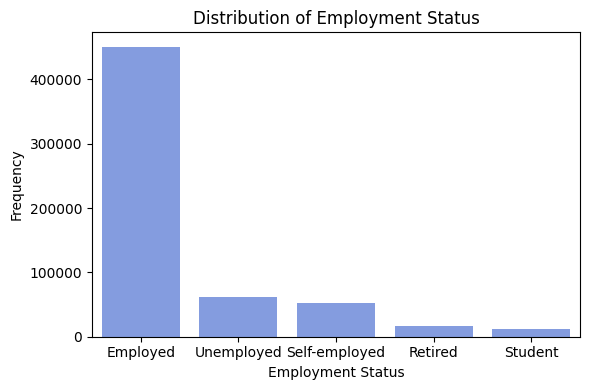

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,
              x='employment_status',
              order=emp_status_counts.index,
              color="#7595EE"
)
plt.title("Distribution of Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.yticks(rotation= 0)
plt.tight_layout()
plt.show()

**Insights**

- This univariate analysis confirms that employment status is highly imbalanced, with most observations belonging to the Employed group.
- The majority of loans were issued to employed customers, accounting for approximately 76% of all issued loans.
- Unemployed customers receive a relatively higher share of loans compared to other groups, suggesting a potential area for further risk analysis.



##### Credit score

In [ ]:
# Measure of centrality
# Mean, Median & Mode
mean_credit_score = num_cols['credit_score'].mean()
median_credit_score = num_cols['credit_score'].median()
mode_credit_score = num_cols['credit_score'].mode().iloc[0]

# Measure of Dispersion
# Maximun & Minimum
credit_score_max = num_cols["credit_score"].max()
credit_score_min = num_cols["credit_score"].min()

# Variance & Standard deviation
credit_score_var = num_cols["credit_score"].var()
credit_score_std = num_cols["credit_score"].std()

# Range
credit_score_range = credit_score_max - credit_score_min

# Interquartile Range (IQR)
Q1 = num_cols["credit_score"].quantile(0.25)
Q3 = num_cols["credit_score"].quantile(0.75)
credit_score_iqr = Q3 - Q1

# Print results
print("Measure of centrality:")
print(f"Mean: {mean_credit_score:.2f}")
print(f"Median: {median_credit_score}")
print(f"Mode: {mode_credit_score}")

print("\nMeasure of dispersion:")
print(f"Max value: {credit_score_max:.2f}")
print(f"Mini value: {credit_score_min:.2f}")
print(f"Variance: {credit_score_var:.2f}")
print(f"Standard Deviation: {credit_score_std:.2f}")
print(f"Range: {credit_score_range:.2f}")
print(f"IQR: {credit_score_iqr:.2f}")

Measure of centrality:
Mean: 680.92
Median: 682.0
Mode: 678

Measure of dispersion:
Max value: 849.00
Mini value: 395.00
Variance: 3071.93
Standard Deviation: 55.42
Range: 454.00
IQR: 73.00


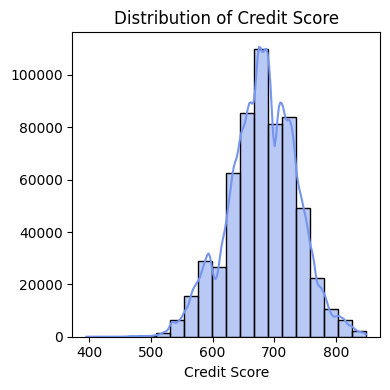

In [ ]:
# Credit score distribution
plt.figure(figsize=(4,4))
sns.histplot(
            data= num_cols,
            x= "credit_score",
            bins=20,
            kde= True,
            color= "#7595EE"
)
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate skewness and kurtosis score
credit_score_skew =  num_cols.credit_score.skew()
credit_score_kurtosis = num_cols.credit_score.kurtosis()
print("Credit Score")
print(f"Skewness Score: {credit_score_skew:.2f}")
print(f"Kurtosis score: {credit_score_kurtosis:.2f}")

Credit Score
Skewness Score: -0.17
Kurtosis score: 0.10


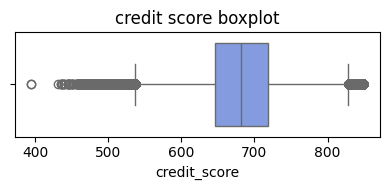

In [ ]:
# Outlier Assessment
plt.figure(figsize=(4, 2))
sns.boxplot(
    data=num_cols,
    x='credit_score',
    color="#7595EE"
)
plt.title("credit score boxplot")
plt.xlabel("credit_score")
plt.tight_layout()
plt.show()

**Insights: Credit scores**

- Credit scores are mainly concentrated in the high-600 range, with most values between 650 and 720.

- The distribution is approximately symmetric, supported by a skewness close to zero (−0.17).

- The boxplot shows values at both lower and higher ends, which reflect natural variation rather than true outliers given the large sample size.

- Overall, the credit score distribution is stable and well-distributed, making it suitable for further bivariate analysis (e.g., with interest rate or loan amount).

##### Annual Income

In [ ]:
# Measure of centrality
# Mean, Median & Mode
annual_income_mean = num_cols['annual_income'].mean()
annual_income_median = num_cols['annual_income'].median()
annual_income_mode = num_cols['annual_income'].mode().iloc[0]

# Measure of Dispersion
# Maximun & Minimum
annual_income_max = num_cols["annual_income"].max()
annual_income_min = num_cols["annual_income"].min()

# Variance & Standard deviation
annual_income_var = num_cols["annual_income"].var()
annual_income_std = num_cols["annual_income"].std()

# Range
annual_income_range = annual_income_max - annual_income_min

# Interquartile Range (IQR)
Q1 = num_cols["annual_income"].quantile(0.25)
Q3 = num_cols["annual_income"].quantile(0.75)
annual_income_iqr = Q3 - Q1

# Print results
print("Measure of centrality:")
print(f"Mean: {annual_income_mean:.2f}")
print(f"Median: {annual_income_median}")
print(f"Mode: {annual_income_mode}")

print("\nMeasure of dispersion:")
print(f"Max value: {annual_income_max:.2f}")
print(f"Mini value: {annual_income_min:.2f}")
print(f"Variance: {annual_income_var:.2f}")
print(f"Standard Deviation: {annual_income_std:.2f}")
print(f"Range: {annual_income_range:.2f}")
print(f"IQR: {annual_income_iqr:.2f}")

Measure of centrality:
Mean: 48212.20
Median: 46557.68
Mode: 51351.71

Measure of dispersion:
Max value: 393381.74
Mini value: 6002.43
Variance: 713527849.60
Standard Deviation: 26711.94
Range: 387379.31
IQR: 33046.92


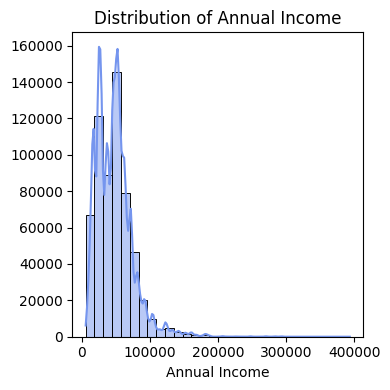

In [ ]:
# Annual income distribution
plt.figure(figsize=(4,4))
sns.histplot(
    data= num_cols,
    x= "annual_income",
    bins=30,
    kde= True,
    color= '#7595EE'
)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate skewness and kurtosis score
annual_income_skew =  num_cols.annual_income.skew()
annual_income_kurtosis = num_cols.annual_income.kurtosis()

print(f"Skewness of annual income column: {annual_income_skew:.2f}")
print(f"kurtosis score for annual income column: {annual_income_kurtosis:.2f}")

Skewness of annual income column: 1.72
kurtosis score for annual income column: 7.09


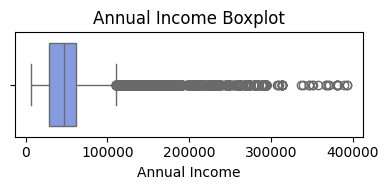

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(
    data= num_cols,
    x= "annual_income",
    color="#7595EE"
)
plt.title("Annual Income Boxplot")
plt.xlabel("Annual Income")
plt.tight_layout()
plt.show()

**Insights**

It is clearly evident tha ``Annual income`` exhibits a strong right-skewed distribution, with most borrowers concentrated in the lower-to-middle income range.

The mean income ($48.2k) is higher than the median income ($46.6k), reflecting the influence of high-income values in the right tail.

The boxplot shows a large number of high-income observations; given the large sample size, these represent natural distribution tails rather than data quality issues.

Due to this skewness, median and IQR are more representative of a typical borrower’s income than the mean.

This distribution should be considered when analyzing relationships between income and loan attributes in subsequent bivariate analysis.

#### Loan Characteristics Univariate Analysis

##### Loan purpose

In [ ]:
cat_cols.loan_purpose.nunique(), cat_cols.loan_purpose.unique()

(8,
 array(['Other', 'Debt consolidation', 'Home', 'Education', 'Vacation',
        'Car', 'Medical', 'Business'], dtype=object))

In [ ]:
# Frequency counts
loan_purpose_counts = df['loan_purpose'].value_counts()

# Percentage distribution
loan_purpose_percent = df['loan_purpose'].value_counts(normalize=True) * 100

loan_purpose_counts, loan_purpose_percent.round(2)

(loan_purpose
 Debt consolidation    324695
 Other                  63874
 Car                    58108
 Home                   44118
 Education              36641
 Business               35303
 Medical                22806
 Vacation                8449
 Name: count, dtype: int64,
 loan_purpose
 Debt consolidation    54.66
 Other                 10.75
 Car                    9.78
 Home                   7.43
 Education              6.17
 Business               5.94
 Medical                3.84
 Vacation               1.42
 Name: proportion, dtype: float64)

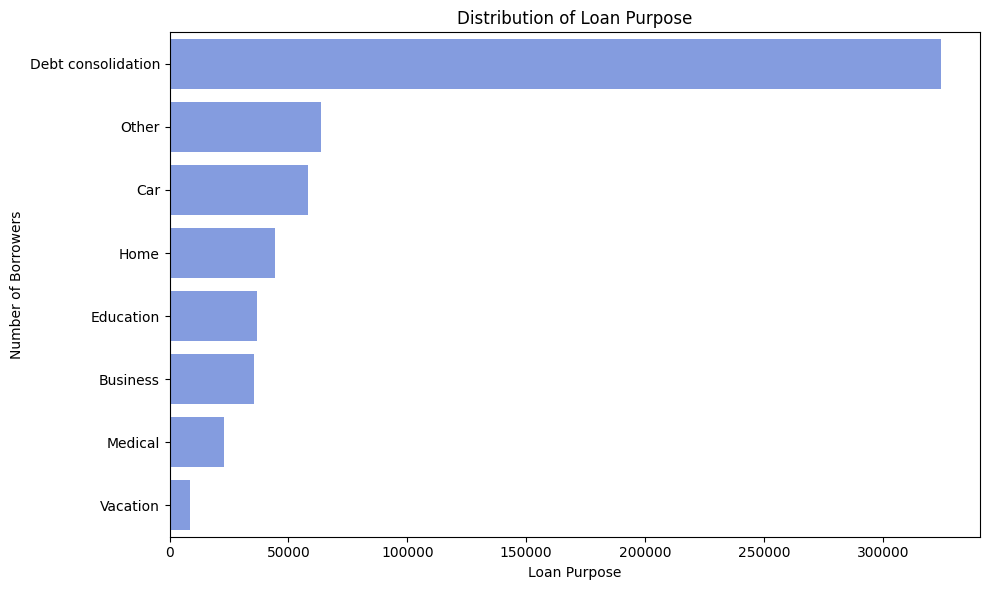

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y="loan_purpose",
    order=loan_purpose_counts.index,
    color="#7595EE"
)
plt.title("Distribution of Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Number of Borrowers")
plt.tight_layout()
plt.show()

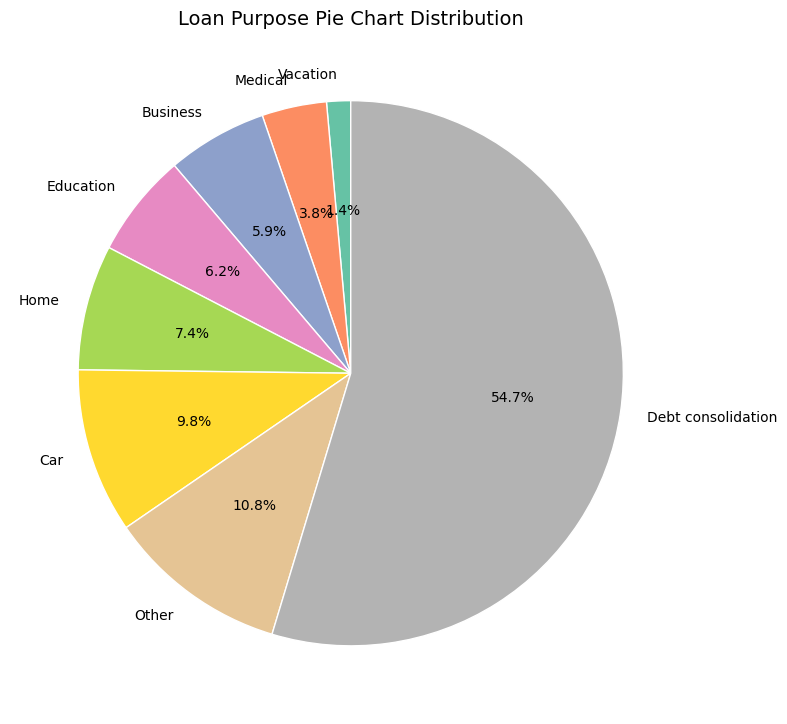

In [ ]:
# Loan purpose distribution pie chart
plt.figure(figsize=(8, 8))

loan_purpose_percent.sort_values().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2"),
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 10}
)
plt.title("Loan Purpose Pie Chart Distribution", fontsize=14)
plt.ylabel("")  # removes default y-label
plt.tight_layout()
plt.show()

**Insights: Loan Purpose**

- Loan demand is highly concentrated, with Debt consolidation accounting for approximately 54.7% of all loans.

- The remaining loan purposes are distributed across several categories, each representing a substantially smaller share of the dataset.

- Vacation, medical, and business loans are relatively infrequent compared to other purposes.

- This imbalance indicates that analyses involving less common loan purposes should be interpreted with caution in subsequent comparisons.

##### Loan Amount

In [ ]:
# Descriptive statistics
print(f"Mean: {df['loan_amount'].mean():.2f}")
print(f"Median: {df['loan_amount'].median():.2f}")
print(f"Mode: {df['loan_amount'].mode().iloc[0]:.2f}")
print(f"Standard Deviation: {df['loan_amount'].std():.2f}")
print(f"Variance: {df['loan_amount'].var():.2f}")
print(f"Minimum: {df['loan_amount'].min():.2f}")
print(f"Maximum: {df['loan_amount'].max():.2f}")

# Calculate interquatile range
q1 = np.percentile(df['loan_amount'], 25)
q2 = np.percentile(df['loan_amount'], 50)
q3 = np.percentile(df['loan_amount'], 75)
q4 = np.percentile(df['loan_amount'], 100)

loan_amount_iqr = q3-q1
print(f"IQR: {loan_amount_iqr:.2f}")

Mean: 15020.30
Median: 15000.22
Mode: 12892.25
Standard Deviation: 6926.53
Variance: 47976825.70
Minimum: 500.09
Maximum: 48959.95
IQR: 8578.96


In [ ]:
num_cols["loan_amount"].describe().round(2)

count    593994.00
mean      15020.30
std        6926.53
min         500.09
25%       10279.62
50%       15000.22
75%       18858.58
max       48959.95
Name: loan_amount, dtype: float64

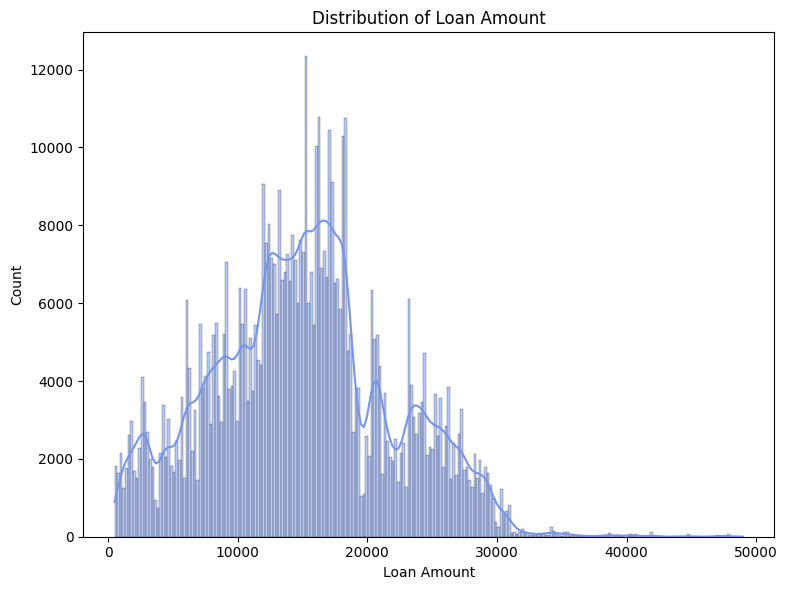

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=num_cols,
    x="loan_amount",
    bins="auto",
    kde=True,
    color="#7595EE"
)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

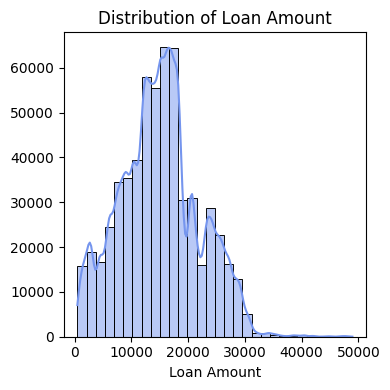

In [ ]:
# Set bins = 30
plt.figure(figsize=(4, 4))
sns.histplot(
    data=num_cols,
    x="loan_amount",
    bins=30,
    kde=True,
    color="#7595EE"   # green tone, consistent & readable
)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate skewness & Kurtosis score
loan_amount_skew = num_cols['loan_amount'].skew()
loan_amount_kurtosis = num_cols['loan_amount'].kurt()
print("Loan Amount")
print(f"Skewness: {loan_amount_skew:.2f}")
print(f"Kurtosis score: {loan_amount_kurtosis:.2f}")

Loan Amount
Skewness: 0.21
Kurtosis score: -0.15


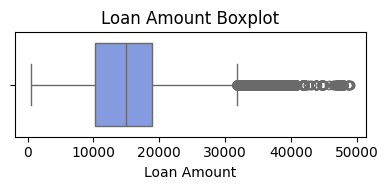

In [ ]:
# Outlier Assessment
plt.figure(figsize=(4, 2))
sns.boxplot(
    data=df,
    x="loan_amount",
    color="#7595EE"
)
plt.title("Loan Amount Boxplot")
plt.xlabel("Loan Amount")
plt.tight_layout()
plt.show()

**Insights: Loan Amount**

- Loan amounts are centered around $15,000, with mean ($15,020) and median ($15,000) almost identical.

- Most loans fall between $10,000 and $20,000 (supported by IQR: ~$10.3k to ~$18.9k).

- The distribution is approximately symmetric with a very slight right skew (skewness = 0.21).

- Kurtosis (−0.15) indicates a near-normal tail behavior, with no extreme outliers dominating the distribution.

**Key takeaway:**

Loan amount shows a stable, well-behaved distribution, making it suitable for further bivariate and multivariate analysis without transformation.


##### Interest Rate

In [ ]:
# Descriptive statistics
print(f"Mean: {df['interest_rate'].mean():.2f}")
print(f"Median: {df['interest_rate'].median():.2f}")
print(f"Mode: {df['interest_rate'].mode().iloc[0]:.2f}")
print(f"Standard Deviation: {df['interest_rate'].std():.2f}")
print(f"Variance: {df['interest_rate'].var():.2f}")
print(f"Minimum: {df['interest_rate'].min():.2f}")
print(f"Maximum: {df['interest_rate'].max():.2f}")

# Calculate interquatile range
q1 = np.percentile(df['interest_rate'], 25)
q2 = np.percentile(df['interest_rate'], 50)
q3 = np.percentile(df['interest_rate'], 75)
q4 = np.percentile(df['interest_rate'], 100)

interest_rate_iqr = q3-q1
print(f"IQR: {interest_rate_iqr:.2f}")

Mean: 12.36
Median: 12.37
Mode: 12.31
Standard Deviation: 2.01
Variance: 4.04
Minimum: 3.20
Maximum: 20.99
IQR: 2.69


In [ ]:
print(num_cols["interest_rate"].describe().round(2))

count    593994.00
mean         12.36
std           2.01
min           3.20
25%          10.99
50%          12.37
75%          13.68
max          20.99
Name: interest_rate, dtype: float64


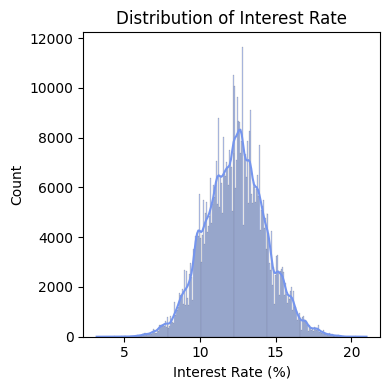

In [ ]:
plt.figure(figsize=(4,4))
sns.histplot(
    num_cols.interest_rate,
    bins="auto",
    kde=True,
    color="#7595EE"
)
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()

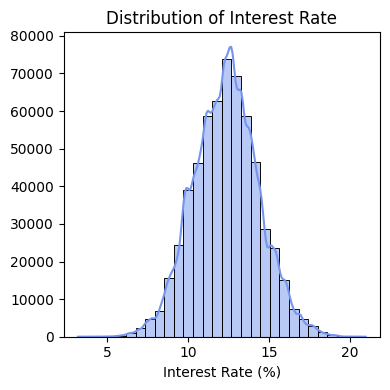

In [ ]:
plt.figure(figsize=(4, 4))
sns.histplot(
    data=num_cols,
    x="interest_rate",
    bins=30,
    kde=True,
    color="#7595EE"
)
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate skewness & Kurtosis score
interest_rate_skew = num_cols['interest_rate'].skew()
interest_rate_kurtosis = num_cols['interest_rate'].kurt()
print("Loan Amount")
print(f"Skewness: {interest_rate_skew:.2f}")
print(f"Kurtosis score: {interest_rate_kurtosis:.2f}")

Loan Amount
Skewness: 0.05
Kurtosis score: 0.06


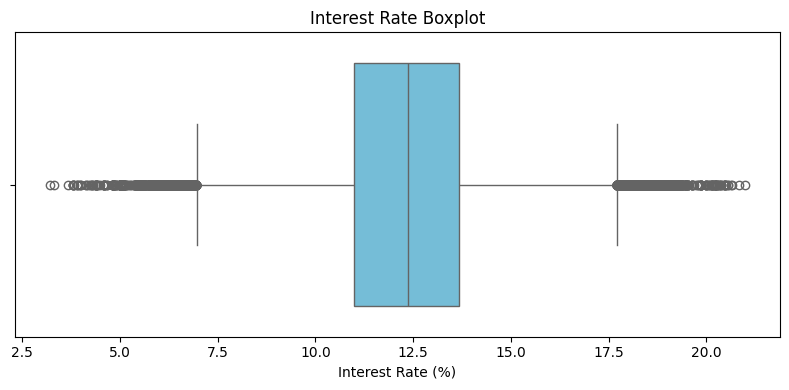

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=num_cols,
    x="interest_rate",
    color="#64C5E8"
)
plt.title("Interest Rate Boxplot")
plt.xlabel("Interest Rate (%)")
plt.tight_layout()
plt.show()

**Insights: Interest Rate**

- Interest rates are concentrated within a narrow and well-defined range, with a median of approximately 12.4%.

- The distribution is approximately symmetric, as indicated by the close alignment of the mean and median.

- Most loans are priced between roughly 11% and 14%, suggesting standardized interest rate bands.

- While some loans appear at the lower and upper ends of the range, these values fall within plausible limits and reflect natural variation rather than anomalies.

- Overall, the interest rate distribution is stable and suitable for further examining relationships with borrower characteristics.

### Bivariate Analysis

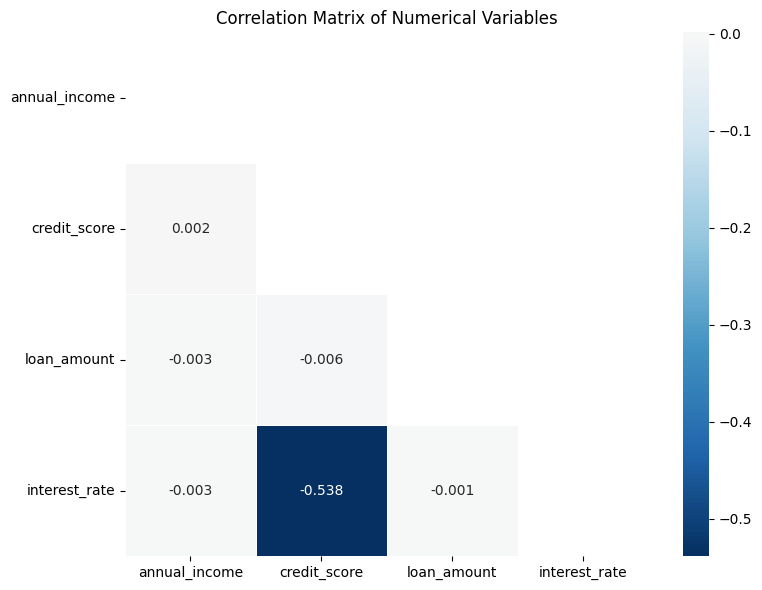

In [ ]:
# Correlation matrix for numerical variables
correlation_matrix = num_cols.corr()

# Mask upper triangle to avoid duplication
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.5,
)

plt.title("Correlation Matrix of Numerical Variables")
plt.xticks(rotation=0, ha="center")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Correlation Summary**

**Research Question 1 (RQ1):How does credit score influence loan attributes?**

***Credit Score vs Interest Rate***

- A strong negative correlation is observed between credit score and interest rate (ρ ≈ −0.54).
- This indicates that borrowers with higher credit scores are consistently offered lower interest rates.

***Credit Score vs Loan Amount***
- The correlation between credit score and loan amount is close to zero, suggesting no meaningful linear relationship.
- Credit score does not appear to significantly influence the size of the loan issued.

***Credit Score vs Loan Purpose***
- Correlation results indicate negligible relationships, implying that loan purpose does not vary meaningfully across different credit score levels.

**Research Question 2 (RQ2):How does annual income relate to loan size?**

- The correlation between annual income and loan amount is close to zero.
- This suggests that annual income alone is not a strong linear determinant of the loan amount issued.

**Conclusion**
Most numerical variable pairs show correlations close to zero, indicating no meaningful linear relationships.
The only notable exception is the moderate negative correlation between credit score and interest rate (ρ ≈ −0.54).

This suggests that credit score strongly influences interest rates, while other numerical factors have limited linear impact.
Therefore, further bivariate analysis will focus on the relationship between credit score and interest rate.

#### Credit Score vs Interest Rate

- **How are credit score and interest rate related?**

In [ ]:
credit_interest_corr = df['credit_score'].corr(df['interest_rate'])
credit_interest_corr

np.float64(-0.5383350142334568)

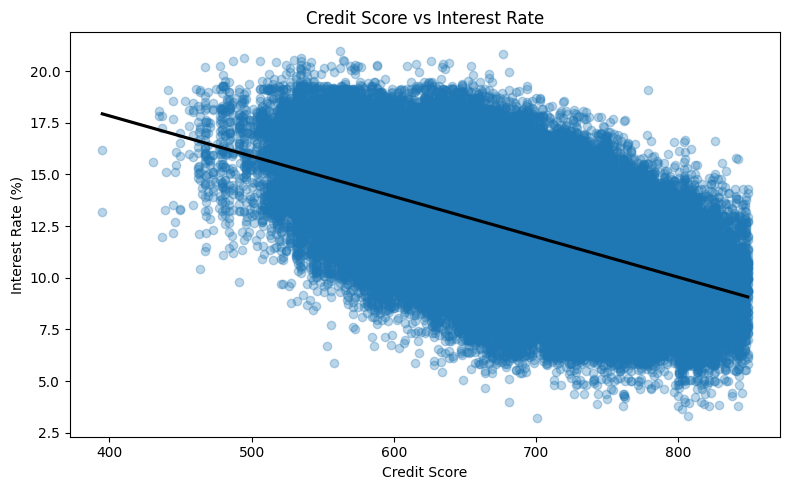

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x="credit_score",
    y="interest_rate",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "black"}
)
plt.title("Credit Score vs Interest Rate")
plt.xlabel("Credit Score")
plt.ylabel("Interest Rate (%)")
plt.tight_layout()
plt.show()

**Insights**

- The scatter plot also with regression line shows also confirmed that credit score and interest rate are negatively related. Higher the credit scores are associated with lower interest rates, while lower credit scores correspond to higher rates.

- This pattern is consistent across the dataset and indicates that **credit score** is a **key factor** associated with loan interest.

#### Credit Score vs Loan Purpose

RQ1:  How does the credit score have influence on  deciding Loan attributes?
- c) How does loan purpose vary across different credit score ranges?

In [ ]:
print(df.groupby("loan_purpose")["credit_score"].describe().round(2))

                       count    mean    std    min    25%    50%    75%    max
loan_purpose                                                                  
Business             35303.0  682.19  55.17  445.0  648.0  683.0  720.0  849.0
Car                  58108.0  680.87  55.67  440.0  647.0  683.0  719.0  849.0
Debt consolidation  324695.0  680.94  55.47  395.0  646.0  682.0  719.0  849.0
Education            36641.0  679.68  54.80  435.0  645.0  682.0  717.0  849.0
Home                 44118.0  682.46  55.48  456.0  648.0  684.0  721.0  849.0
Medical              22806.0  679.87  54.87  435.0  646.0  682.0  716.0  849.0
Other                63874.0  680.25  55.70  446.0  645.0  681.0  718.0  849.0
Vacation              8449.0  680.23  54.75  468.0  647.0  681.0  716.0  849.0


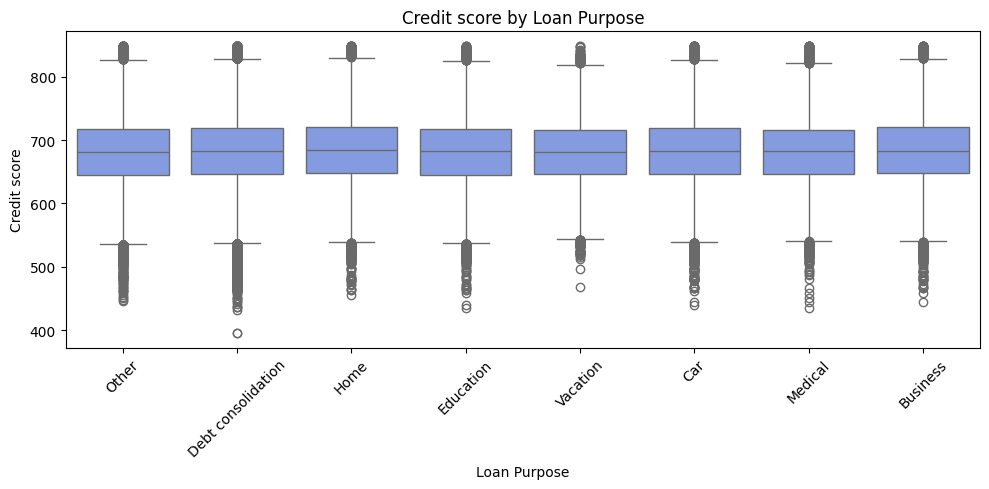

In [ ]:
# Shows median, spread, and outliers.
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="loan_purpose",
    y="credit_score",
    color="#7595EE"
)
plt.title("Credit score by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Credit score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights: Credit score vs Loan purpose**

- Credit score distributions are very similar across all loan purposes.

- Median credit scores are clustered around ~680–684 for every category.

- IQR ranges largely overlap, indicating no meaningful separation by purpose.

- Minor differences in means are not practically significant.

**Conclusion**: Loan purpose does not vary meaningfully across different credit score ranges; credit score does not strongly influence loan purpose selection.

#### Annual Income vs Loan Amount

- Though there is weak relationship between Annual income and Loan amount but we conducted further analysis taking bins into account.

In [ ]:
loan_income_amount_corr = df[['annual_income', 'loan_amount']].corr()
loan_income_amount_corr

,annual_income,loan_amount
annual_income,1.000000,-0.003407
loan_amount,-0.003407,1.000000


In [ ]:
# Define bins (extend last bin to cover all values)
income_amount_bins = [
    0, 25000, 50000, 75000, 100000,
    125000, 150000, 175000, 200000, float("inf")
]

# Define labels (bins - 1)
income_labels = [
    "0–25k", "25k–50k", "50k–75k", "75k–100k",
    "100k–125k", "125k–150k", "150k–175k",
    "175k–200k", "200k+"
]

# Create income bins
df["income_amount_bin"] = pd.cut(
    df["annual_income"],
    bins=income_amount_bins,
    labels=income_labels,
    include_lowest=True
)

In [ ]:
df.head()

,annual_income,credit_score,loan_amount,interest_rate,employment_status,loan_purpose,loan_amount_bins,income_amount_bin
0,29367.99,736,2528.42,13.67,Self-employed,Other,0-5K,25k–50k
1,22108.02,636,4593.10,12.92,Employed,Debt consolidation,0-5K,0–25k
2,49566.20,694,17005.15,9.76,Employed,Debt consolidation,15–20k,25k–50k
3,46858.25,533,4682.48,16.10,Employed,Debt consolidation,0-5K,25k–50k
4,25496.70,665,12184.43,10.21,Employed,Other,10–15k,25k–50k


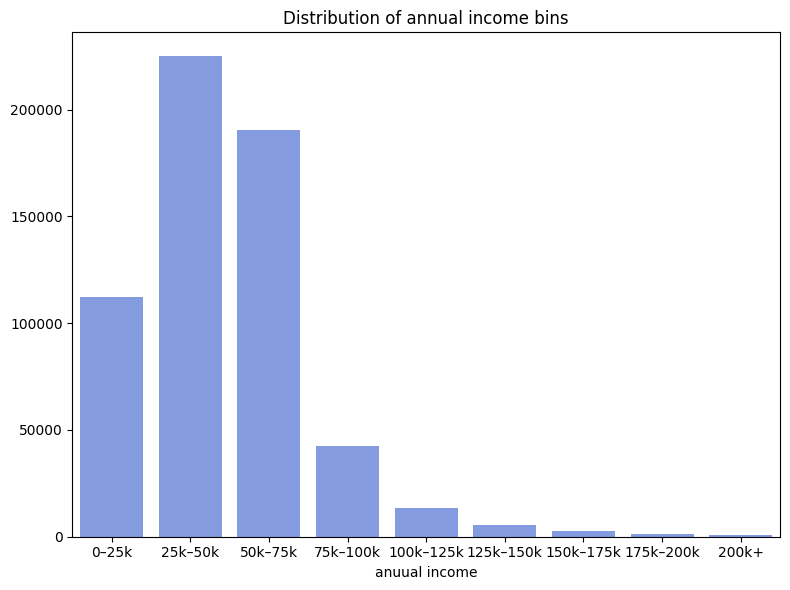

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="income_amount_bin",
    color="#7595EE"
)
plt.title("Distribution of annual income bins")
plt.xlabel("anuual income")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
loan_amount_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000]
loan_amount_labels = ["0-5K", "5–10k","10–15k", "15–20k", "20-25K", "25–30k", "30K-35K", "35–40k", "40–45k", "45–50k", "50-55K"]

df["loan_amount_bins"] = pd.cut(
    df["loan_amount"],
    bins=loan_amount_bins,
    labels=loan_amount_labels,
    include_lowest=True
)

df.head()

,annual_income,credit_score,loan_amount,interest_rate,employment_status,loan_purpose,loan_amount_bins,income_amount_bin
0,29367.99,736,2528.42,13.67,Self-employed,Other,0-5K,25k–50k
1,22108.02,636,4593.10,12.92,Employed,Debt consolidation,0-5K,0–25k
2,49566.20,694,17005.15,9.76,Employed,Debt consolidation,15–20k,25k–50k
3,46858.25,533,4682.48,16.10,Employed,Debt consolidation,0-5K,25k–50k
4,25496.70,665,12184.43,10.21,Employed,Other,10–15k,25k–50k


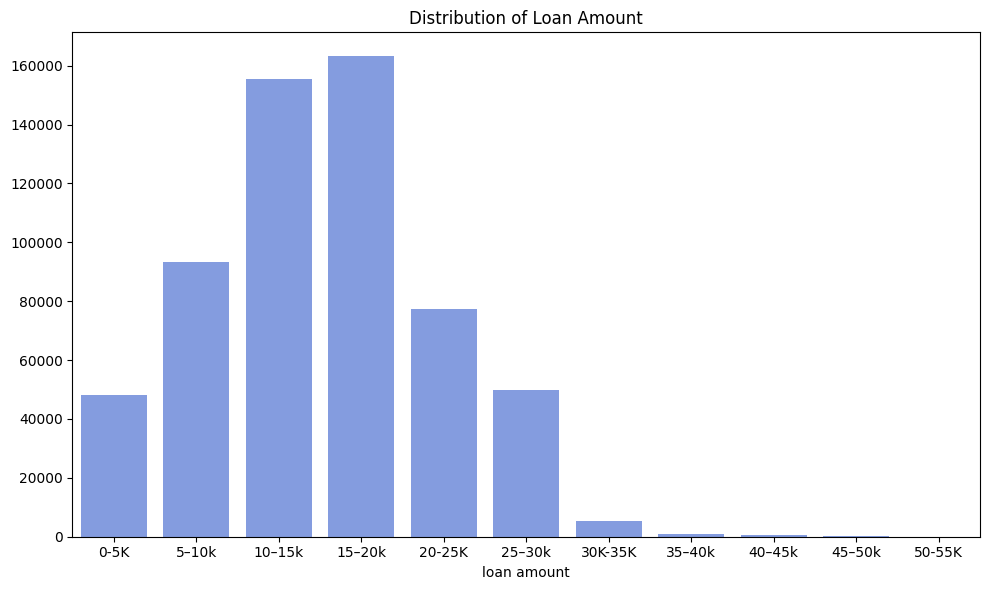

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="loan_amount_bins",
    color="#7595EE"
)
plt.title("Distribution of Loan Amount")
plt.xlabel("loan amount")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,annual_income,credit_score,loan_amount,interest_rate,employment_status,loan_purpose,loan_amount_bins,income_amount_bin
0,29367.99,736,2528.42,13.67,Self-employed,Other,0-5K,25k–50k
1,22108.02,636,4593.10,12.92,Employed,Debt consolidation,0-5K,0–25k
2,49566.20,694,17005.15,9.76,Employed,Debt consolidation,15–20k,25k–50k
3,46858.25,533,4682.48,16.10,Employed,Debt consolidation,0-5K,25k–50k
4,25496.70,665,12184.43,10.21,Employed,Other,10–15k,25k–50k


In [ ]:
crosstab_result_income = pd.crosstab(df['loan_amount_bins'], df['income_amount_bin'])

crosstab_result_income

income_amount_bin,0–25k,25k–50k,50k–75k,75k–100k,100k–125k,125k–150k,150k–175k,175k–200k,200k–225k,225k–250k,250k–275k,275k–300k,300k+
loan_amount_bins,,,,,,,,,,,,,
0-5K,9230,18405,15230,3356,1102,438,228,97,11,11,11,10,1
5–10k,18032,35799,29996,5999,1977,739,458,168,30,21,33,24,5
10–15k,28594,57187,51600,11785,3425,1688,698,307,37,37,31,44,6
15–20k,30982,62060,52034,11749,3474,1470,780,396,76,57,43,30,6
20-25K,14229,29894,24299,5728,1956,611,339,116,30,16,14,20,9
25–30k,9795,19047,15337,3614,1245,504,284,75,14,15,7,17,4
30K-35K,1029,2020,1709,352,130,57,32,11,1,1,1,3,0
35–40k,190,356,212,53,17,5,6,1,0,0,0,0,0
40–45k,102,178,103,30,10,3,5,0,0,0,0,0,0


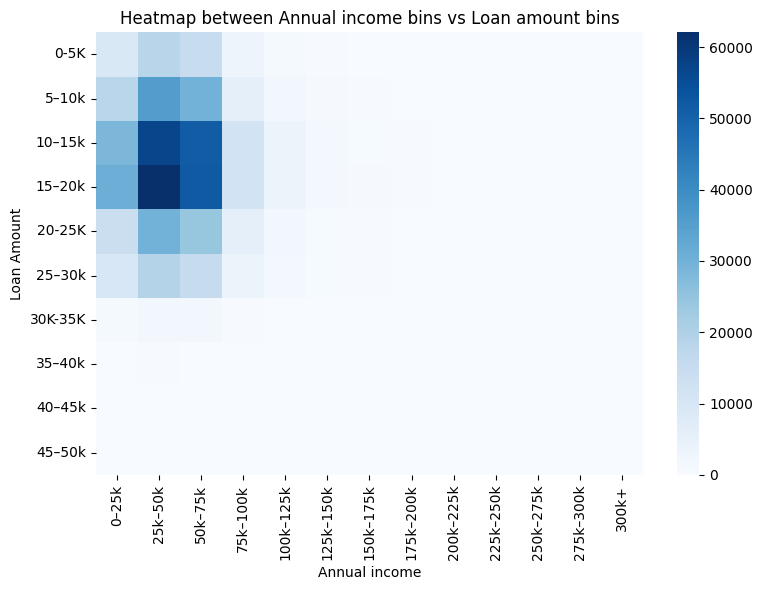

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_result_income,cmap="Blues",annot=False,fmt='d')
plt.title("Heatmap between Annual income bins vs Loan amount bins")
plt.xlabel("Annual income")
plt.ylabel("Loan Amount")
plt.tight_layout()
plt.show()

##### Chi-square test of independence

**Research Question: How does a borrower’s annual income relate to the loan amount issued?**

**Hypotheses Formation**

**Null Hypothesis (H₀):**
- Loan amount and Annual income are independent.

**Alternative Hypothesis (H₁):**
- Loan amount and Annual income are not independent.

In [ ]:
# Chi-square test
_, p_value_income, _, _ = chi2_contingency(crosstab_result_income)

print(f"P-value: {p_value_income:.3e}")

if p_value_income < 0.05:
    print("Reject the Null Hypothesis (H₀).")
    print("There is a statistically significant association between loan amount and annual income purpose.")
else:
    print("Fail to reject the Null Hypothesis (H₀).")
    print("No statistically significant association was found.")

P-value: 2.462e-81
Reject the Null Hypothesis (H₀).
There is a statistically significant association between loan amount and annual income purpose.


In [ ]:
# Cramer's V Test
cramers_v_income = association(crosstab_result_income, method="cramer")
cramers_v_income

0.011167166127380246

#### Employment status Vs Loan Amount

**How do loan amounts differ by employment status?**

In [ ]:
df.groupby("employment_status")["loan_amount"].describe().round()

,count,mean,std,min,25%,50%,75%,max
employment_status,,,,,,,,
Employed,450645.0,15005.0,6915.0,500.0,10270.0,15002.0,18759.0,48960.0
Retired,16453.0,14818.0,6828.0,501.0,10198.0,14652.0,18389.0,47851.0
Self-employed,52480.0,15048.0,6998.0,509.0,10150.0,14864.0,19243.0,48832.0
Student,11931.0,15290.0,7085.0,517.0,10364.0,15207.0,19490.0,47871.0
Unemployed,62485.0,15110.0,6943.0,514.0,10559.0,15011.0,19130.0,47865.0


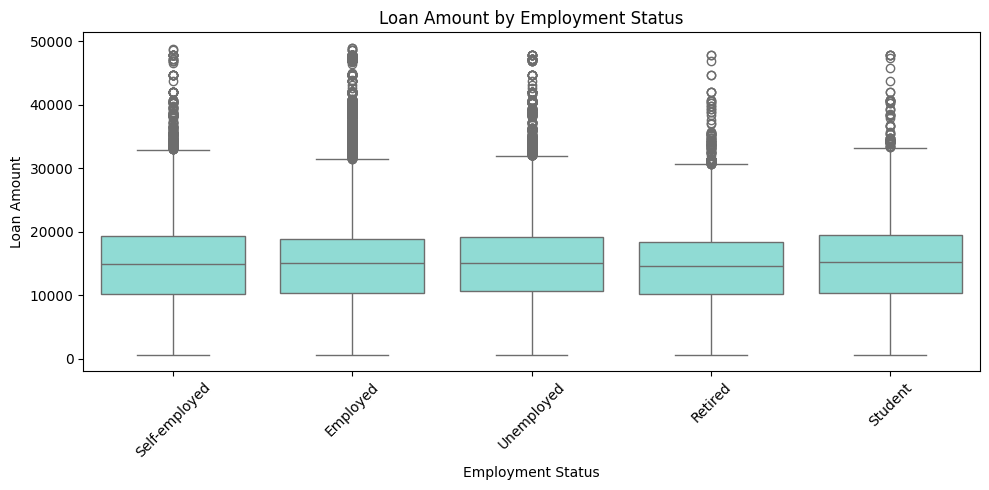

In [ ]:
# Shows median, spread, and outliers.
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="employment_status",
    y="loan_amount",
    color="#83E8DE"
)
plt.title("Loan Amount by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Loan Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights: Employment Status vs Loan Amount**

Median loan amounts are very similar across all employment status groups, generally centered around $15,000.

The spread and interquartile ranges of loan amounts are also comparable, indicating consistent loan sizing regardless of employment category.

While all groups exhibit higher-value loans in the upper tail, these patterns are present across every employment status.

Overall, employment status appears to be weakly associated with loan amount in this dataset.

#### Employment status vs interest rate

**How do interest rates vary across employment statuses?**

In [ ]:
df.groupby("employment_status")["interest_rate"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
employment_status,,,,,,,,
Employed,450645.0,12.33,2.01,3.32,10.97,12.35,13.64,20.99
Retired,16453.0,12.23,2.00,4.12,10.89,12.24,13.54,20.19
Self-employed,52480.0,12.30,2.03,3.20,10.93,12.31,13.63,20.28
Student,11931.0,12.59,2.00,4.57,11.24,12.61,13.89,19.30
Unemployed,62485.0,12.62,1.98,3.89,11.24,12.65,13.93,20.24


- It clearly evident from the descriptive analysis that values are almost similar or near by in each employment status category.
- Temporarily we can draw a conclusion that there is not significant effect of employment status on interest rate.

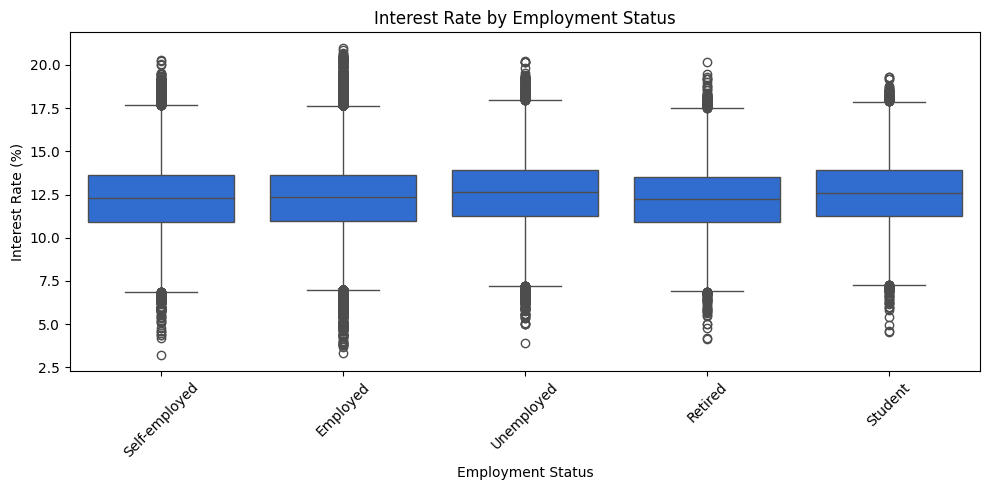

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="employment_status",
    y="interest_rate",
    color="#1667EA"
)
plt.title("Interest Rate by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Interest Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

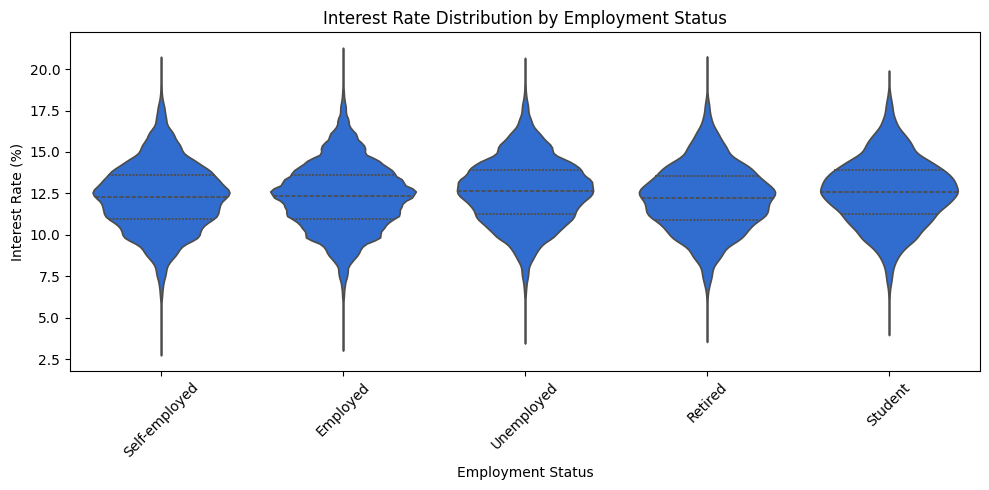

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df,
    x="employment_status",
    y="interest_rate",
    inner="quartile",     # shows median and IQR
    color="#1667EA",
)
plt.title("Interest Rate Distribution by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Interest Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights: Employment Status vs Interest Rate**

Median interest rates are **very similar across all employment status groups**, with values clustered around 12–13%.

The violin plots further confirm that the distribution shapes and densities of interest rates are alike across groups.

While students and unemployed borrowers show slightly higher median rates, the overall differences are **small**, suggesting that employment status is **weakly associated** with interest rate compared to borrower-specific factors such as credit score.

#### Employment Status vs Loan Purpose
**How does loan purpose distribution differ by employment status?**

In [ ]:
crosstab_employment = pd.crosstab(df.employment_status,df.loan_purpose)
crosstab_employment

loan_purpose,Business,Car,Debt consolidation,Education,Home,Medical,Other,Vacation
employment_status,,,,,,,,
Employed,27226,43548,246853,27222,34279,16673,48351,6493
Retired,1069,1744,8628,1017,1328,643,1844,180
Self-employed,2986,5529,28180,3332,3728,2315,5740,670
Student,703,1214,6418,817,941,507,1187,144
Unemployed,3319,6073,34616,4253,3842,2668,6752,962


In [ ]:
crosstab_percent = pd.crosstab(
    df['employment_status'],
    df['loan_purpose'],
    normalize='index'
) * 100

crosstab_percent.round(2)

loan_purpose,Business,Car,Debt consolidation,Education,Home,Medical,Other,Vacation
employment_status,,,,,,,,
Employed,6.04,9.66,54.78,6.04,7.61,3.70,10.73,1.44
Retired,6.50,10.60,52.44,6.18,8.07,3.91,11.21,1.09
Self-employed,5.69,10.54,53.70,6.35,7.10,4.41,10.94,1.28
Student,5.89,10.18,53.79,6.85,7.89,4.25,9.95,1.21
Unemployed,5.31,9.72,55.40,6.81,6.15,4.27,10.81,1.54


##### Correlation Heatmap

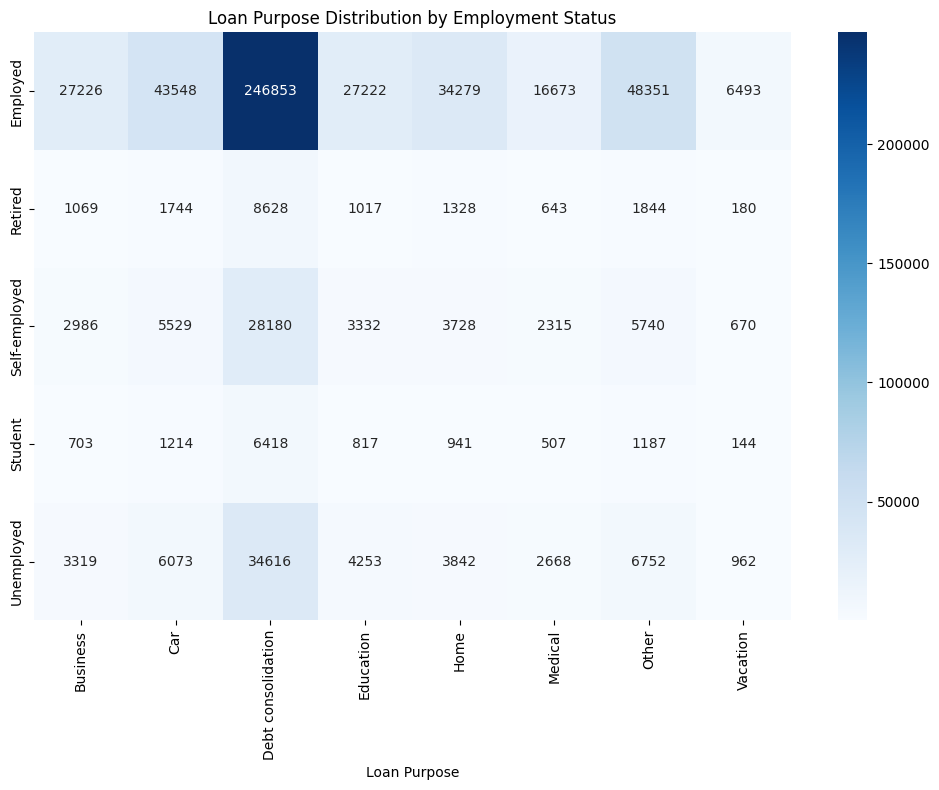

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_employment,cmap="Blues",annot=True,fmt='d')
plt.title("Loan Purpose Distribution by Employment Status")
plt.xlabel("Loan Purpose")
plt.ylabel("")
plt.tight_layout()
plt.show()

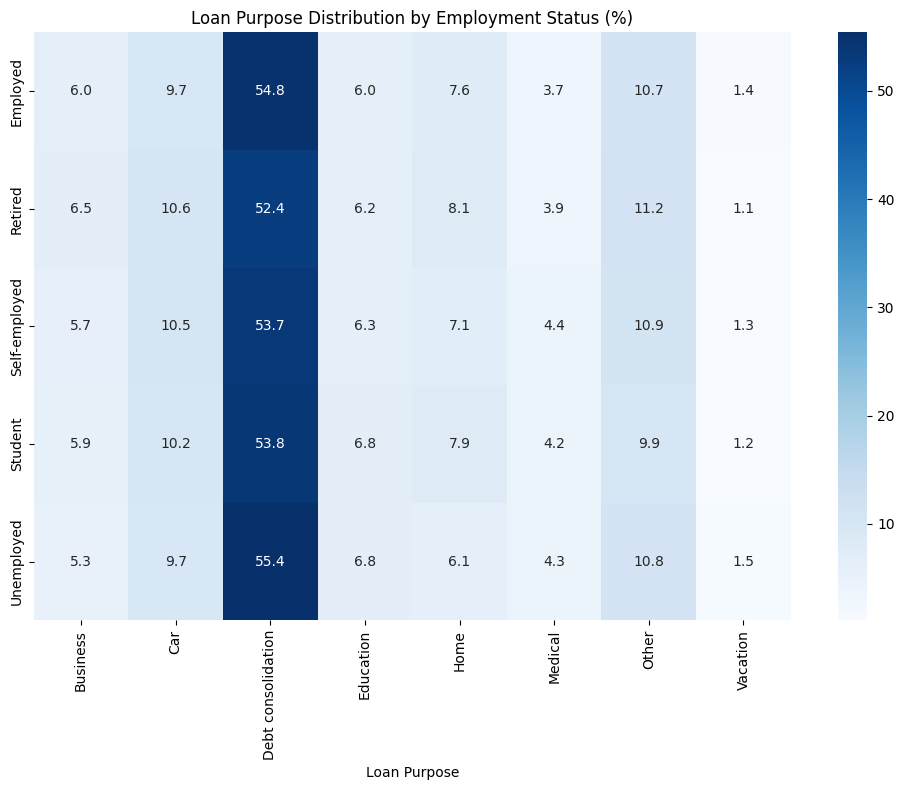

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    crosstab_percent,
    annot=True,
    fmt=".1f",
    cmap="Blues"
)
plt.title("Loan Purpose Distribution by Employment Status (%)")
plt.xlabel("Loan Purpose")
plt.ylabel("")
plt.tight_layout()
plt.show()

##### Chi-square test of independence

**Research Question: Is loan purpose associated with employment status?**

**Hypotheses Formation**

**Null Hypothesis (H₀):**

- Loan purpose and employment status are independent.
- The distribution of loan purposes is the same across all employment status categories.

**Alternative Hypothesis (H₁):**

- Loan purpose and employment status are not independent.
- The distribution of loan purposes differs across employment status categories

In [ ]:
# Chi-square test
_, p_value, _, _ = chi2_contingency(crosstab_employment)

print(f"P-value: {p_value:.3e}")

if p_value < 0.05:
    print("Reject the Null Hypothesis (H₀).")
    print("There is a statistically significant association between employment status and loan purpose.")
else:
    print("Fail to reject the Null Hypothesis (H₀).")
    print("No statistically significant association was found.")

P-value: 3.495e-95
Reject the Null Hypothesis (H₀).
There is a statistically significant association between employment status and loan purpose.


In [ ]:
# Cramer's V Test
cramers_v = association(crosstab_employment, method="cramer")
cramers_v

0.01501011314272991

**Chi-Square Test & Effect Size Interpretation**

- The chi-square test indicates a statistically significant association between employment status and loan purpose (p < 0.05).

- However, the effect size measured by Cramér’s V (0.015) is extremely small, indicating a very **weak association**.

- This suggests that while differences in loan purpose distribution across employment status groups are detectable statistically, they are minimal in practical terms.

- Overall, employment status explains very little variation in loan purpose.

#### Loan Purpose vs Loan Amount

**How do loan amounts differ across loan purposes?**

In [ ]:
df.groupby("loan_purpose")["loan_amount"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
loan_purpose,,,,,,,,
Business,35303.0,14928.27,6905.89,507.41,10204.31,14809.46,18700.32,48954.70
Car,58108.0,14886.04,6914.43,500.37,10176.05,14861.78,18677.15,48632.61
Debt consolidation,324695.0,15058.31,6936.47,500.09,10303.65,15051.99,18872.12,48831.85
Education,36641.0,14916.96,6864.21,507.46,10134.88,14900.76,18677.15,47865.22
Home,44118.0,14933.44,7007.39,514.50,10084.05,14800.42,19101.75,47865.72
Medical,22806.0,15010.54,6956.64,512.53,10181.04,15008.93,18888.91,48959.95
Other,63874.0,15129.14,6868.74,509.42,10504.47,15110.76,19121.88,47865.35
Vacation,8449.0,14972.70,6885.93,515.52,10275.01,14792.36,18805.67,47798.75


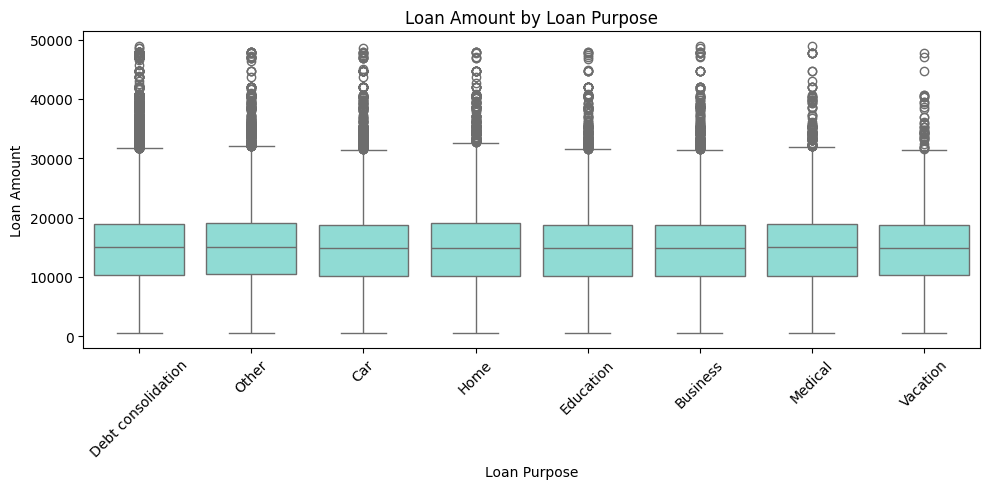

In [ ]:
# Shows median, spread, and outliers.
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="loan_purpose",
    y="loan_amount",
    color="#83E8DE",
    order=df['loan_purpose'].value_counts().index
)
plt.title("Loan Amount by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Loan Amount")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

In [ ]:
# df["loan_bins"] = pd.cut(df["loan_amount"], bins=20)

In [ ]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000]
labels = ["0-5K", "5–10k","10–15k", "15–20k", "20-25K", "25–30k", "30K-35K", "35–40k", "40–45k", "45–50k", "50-55K"]

df["loan_amount_bins"] = pd.cut(
    df["loan_amount"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df.head()

,annual_income,credit_score,loan_amount,interest_rate,employment_status,loan_purpose,loan_amount_bins
0,29367.99,736,2528.42,13.67,Self-employed,Other,0-5K
1,22108.02,636,4593.10,12.92,Employed,Debt consolidation,0-5K
2,49566.20,694,17005.15,9.76,Employed,Debt consolidation,15–20k
3,46858.25,533,4682.48,16.10,Employed,Debt consolidation,0-5K
4,25496.70,665,12184.43,10.21,Employed,Other,10–15k


In [ ]:
loan_amount_bins_sort =df["loan_amount_bins"].value_counts().sort_index()
loan_amount_bins_sort

loan_amount_bins
0-5K        48130
5–10k       93281
10–15k     155439
15–20k     163157
20-25K      77261
25–30k      49958
30K-35K      5346
35–40k        840
40–45k        431
45–50k        151
50-55K          0
Name: count, dtype: int64

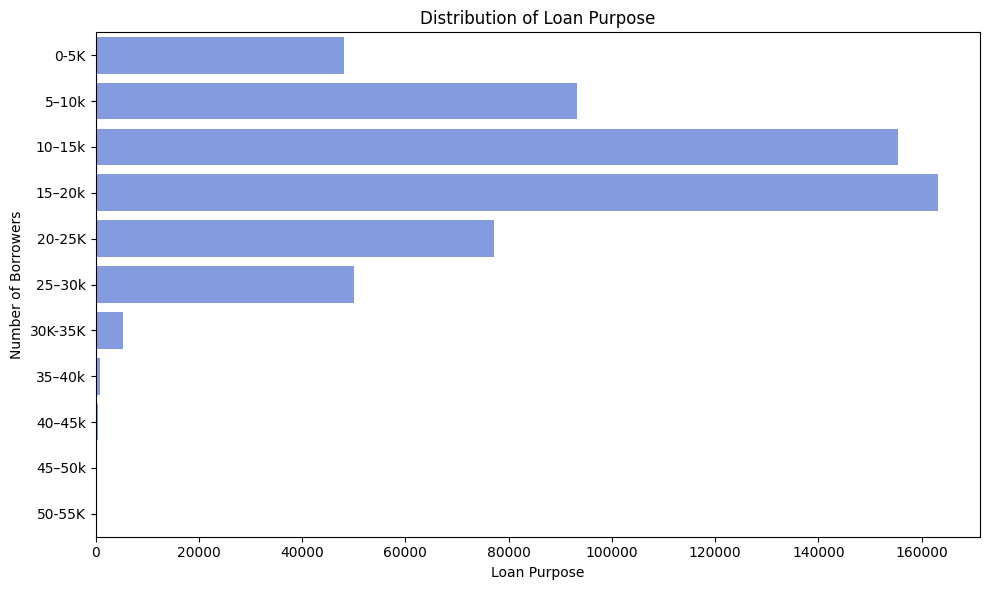

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y="loan_amount_bins",
    order=loan_amount_bins_sort.index,
    color="#7595EE"
)
plt.title("Distribution of Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Number of Borrowers")
plt.tight_layout()
plt.show()

In [ ]:
crosstab_loan_amt = pd.crosstab(df["loan_amount_bins"], df['loan_purpose'])
crosstab_loan_amt

loan_purpose,Business,Car,Debt consolidation,Education,Home,Medical,Other,Vacation
loan_amount_bins,,,,,,,,
0-5K,2835,4799,26573,2859,3679,1813,4917,655
5–10k,5664,9385,50068,6164,7300,3752,9602,1346
10–15k,9506,15325,84512,9442,11547,5804,16975,2328
15–20k,9486,15829,90223,10103,11377,6284,17621,2234
20-25K,4481,7379,41835,4750,6076,2975,8676,1089
25–30k,2939,4718,27722,2920,3638,1916,5408,697
30K-35K,305,553,2971,321,387,208,522,79
35–40k,52,61,479,44,64,34,93,13
40–45k,23,45,231,31,42,13,40,6


##### Correlation Heatmap

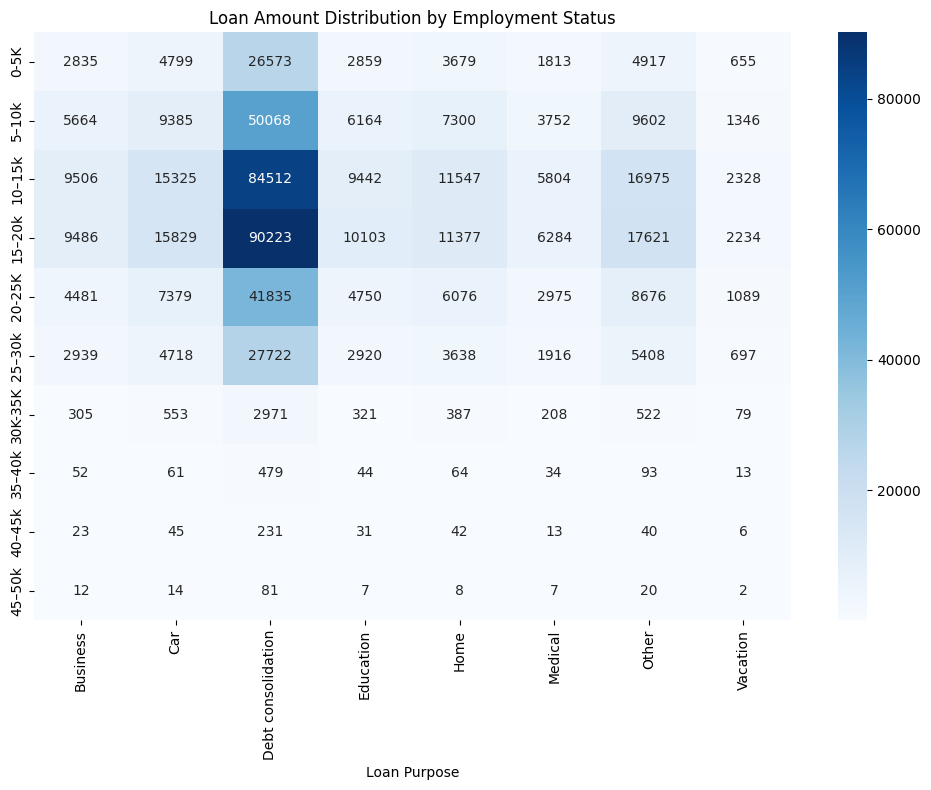

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_loan_amt,cmap="Blues",annot=True,fmt='d')
plt.title("Loan Amount Distribution by Employment Status")
plt.xlabel("Loan Purpose")
plt.ylabel("")
plt.tight_layout()
plt.show()

##### Chi-Square test of independence

In [ ]:
# Chi-square test
_, p_value_amt, _, _ = chi2_contingency(crosstab_loan_amt)

print(f"P-value: {p_value_amt:.3e}")

if p_value_amt < 0.05:
    print("Reject the Null Hypothesis (H₀).")
    print("There is a statistically significant association between employment status and loan purpose.")
else:
    print("Fail to reject the Null Hypothesis (H₀).")
    print("No statistically significant association was found.")

P-value: 4.435e-36
Reject the Null Hypothesis (H₀).
There is a statistically significant association between employment status and loan purpose.


In [ ]:
# Cramer's V Test
cramers_v_amt = association(crosstab_loan_amt, method="cramer")
cramers_v_amt

0.0087739136702462

## Key Findings

- The dataset contains a large and diverse borrower population, with employed individuals representing the majority of loan recipients.
- Credit score has a strong influence on interest rate, showing a clear negative relationship: higher credit scores are associated with lower interest rates.
- Annual income shows little to no linear relationship with loan amount, indicating it is not a primary determinant of loan size on its own.
- Loan amounts are broadly similar across employment statuses, with no substantial differences in central tendency.
- Interest rates remain relatively consistent across employment categories, suggesting employment status has limited direct impact on pricing.
- Loan purpose distribution varies by employment status, but the association is statistically weak, as indicated by a low Cramér’s V value.
